<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [13]:
# Imports
import numpy as np
import pandas as pd
import tensorflow
from sklearn.preprocessing import MinMaxScaler, Normalizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LeakyReLU
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import to_categorical

In [66]:
from tensorflow.keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2, seed=27)

In [67]:
# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [68]:
# Reshape y 
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_train.shape, y_test.shape

((404, 1), (102, 1))

In [69]:
# Instantiate the model
model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu', name="FirstHidden"))
model.add(Dense(8, activation='relu', name="SecondHidden"))
model.add(Dense(1, name="Output"))
# Compile the model 
model.compile(loss='mse', optimizer='adam',
              metrics=['mse'])

# Let's inspect our new architecture
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstHidden (Dense)          (None, 8)                 112       
_________________________________________________________________
SecondHidden (Dense)         (None, 8)                 72        
_________________________________________________________________
Output (Dense)               (None, 1)                 9         
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [70]:
history = model.fit(X_train, y_train, epochs=500, verbose=False, validation_split = .2)

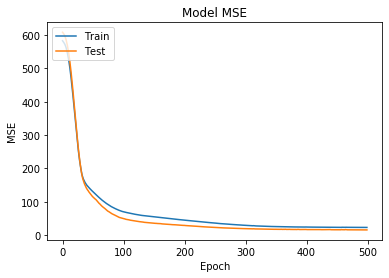

In [71]:
# Plot training & validation accuracy values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [72]:
scores = model.evaluate(X_test, y_test)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [73]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)
mean_squared_error(linreg_pred, y_test)

21.03101274636393

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [20]:
# Hyper Parameters
batch_size = 64
num_classes = 10
epochs = 20

In [21]:
# Load in the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [22]:
# Reshape the data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [24]:
# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# X Variable Types
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [26]:
# Correct Encoding on Y
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [50]:
# Instantiate the model
model = Sequential()
model.add(Dense(8, input_dim=784, activation='relu', name="FirstHidden"))
model.add(Dense(8, activation='relu', name="SecondHidden"))
model.add(Dense(10, name="Output"))
# Compile the model 
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# Let's inspect our new architecture
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstHidden (Dense)          (None, 8)                 6280      
_________________________________________________________________
SecondHidden (Dense)         (None, 8)                 72        
_________________________________________________________________
Output (Dense)               (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X_train, y_train, epochs=10, verbose=False, validation_split = .2)

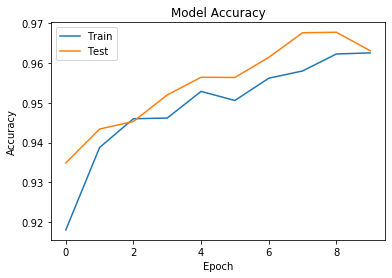

In [55]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.